In [2]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv('../data/raw/netflix_data.csv')

Filtered the data by the release year so we can check the duration of the latest movie from the 1990's

In [7]:
filtered_by_1990 = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] < 2000)]
filtered_by_1990

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
...,...,...,...,...,...,...,...,...,...,...,...
4672,s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,"October 19, 2020",1999,106,Three intrepid teens roam the streets of Beiru...,Dramas
4689,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",1993,118,"In a backwater Iowa town, young Gilbert is tor...",Classic Movies
4718,s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,106,"Armed with an ingenious arsenal, two top-notch...",Action
4746,s7682,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,191,Legendary lawman Wyatt Earp is continually at ...,Action


In [ ]:
latest_movie_1990s = filtered_by_1990.sort_values(by='release_year', ascending=False).head(1)
latest_movie_1990s[['title', 'release_year', 'duration']]

,title,release_year,duration
315,American Beauty,1999,122


In [11]:
duration = int(filtered_by_1990["duration"].mode(dropna=True).iloc[0])
str(duration) + " minutes"

'94 minutes'

In [12]:
short_movie_count = int(((filtered_by_1990['genre'] == 'Action') & (filtered_by_1990['duration'] < 90)).sum())
str(short_movie_count) + " movies with duration less than 90 minutes in the Action genre in the 1990's"

"7 movies with duration less than 90 minutes in the Action genre in the 1990's"

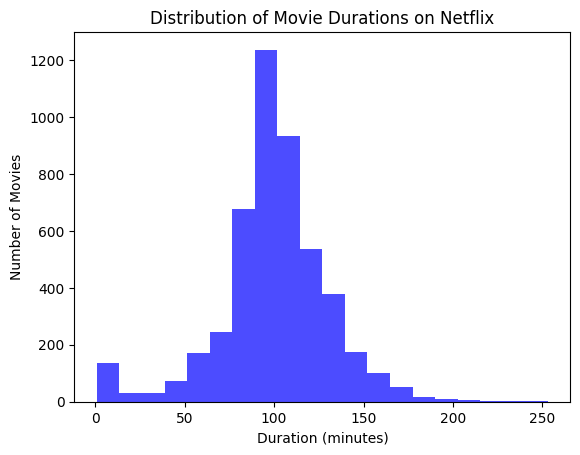

In [46]:
movie_distribution = plt.hist(netflix_df['duration'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Durations on Netflix')
plt.savefig("../charts/movie_distribution_by_duration.png", bbox_inches="tight", dpi=300)

Top 5 Genres in the 1990's

In [47]:
most_popular_genres = filtered_by_1990['genre'].value_counts().head(10)
most_popular_genres

genre
Action            48
Dramas            44
Comedies          40
Children          15
Classic Movies    15
Stand-Up           8
Thrillers          5
Horror Movies      4
Documentaries      2
Cult Movies        2
Name: count, dtype: int64

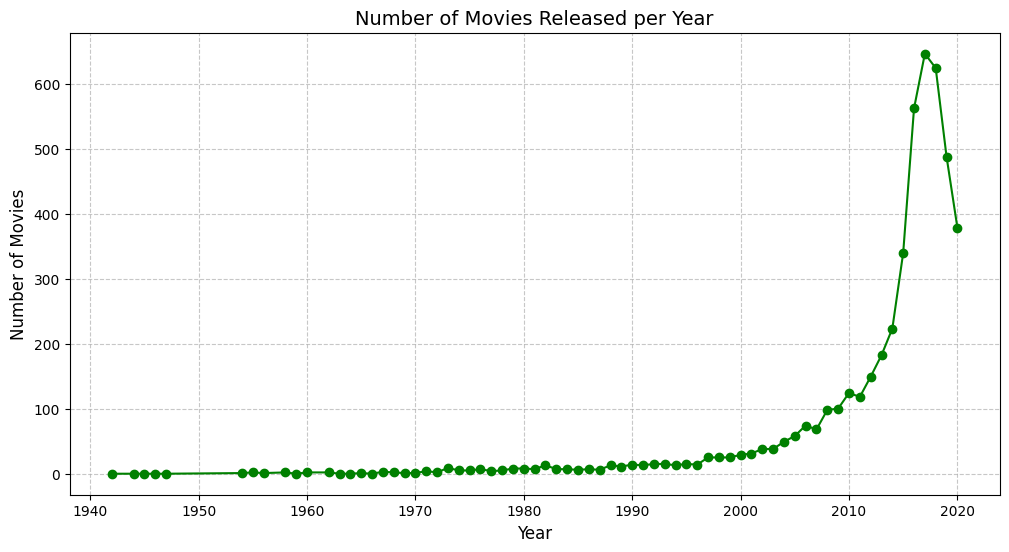

In [44]:
movies_per_year = netflix_df[netflix_df["release_year"] < 2021]["release_year"].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='green')

plt.title("Number of Movies Released per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("../charts/movies_released_per_year.png", bbox_inches="tight", dpi=300)
plt.show()

After peaking in 2019, the number of movies released declined in 2020, likely due to incomplete data and the COVID-19 pandemic.

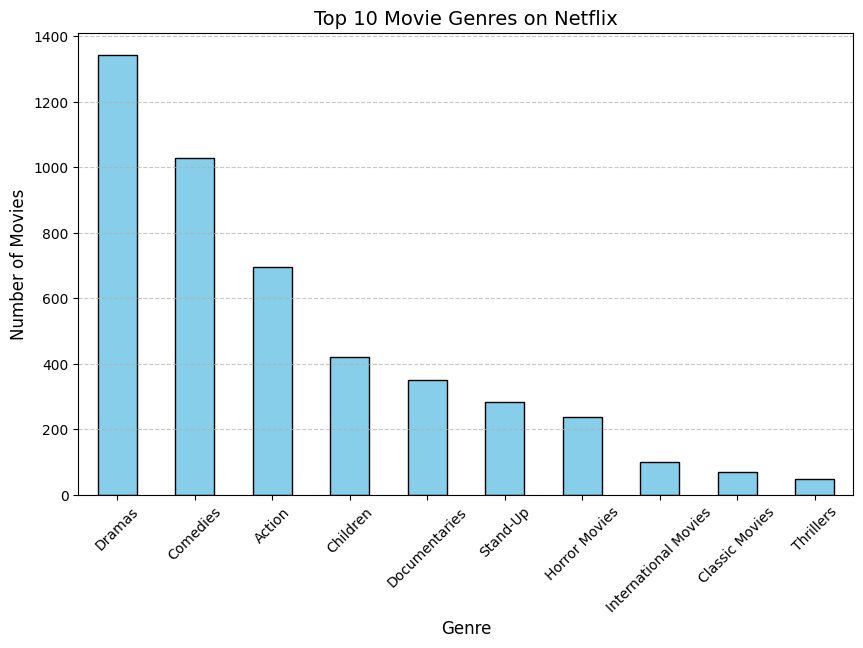

In [45]:
genre_counts = netflix_df['genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 Movie Genres on Netflix", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("../charts/top_10_movie_genres.png", bbox_inches="tight", dpi=300)
plt.show()

Drama and Comedy dominate the Netflix catalog. The number of movies increased exponentially after 2000